### Import necessary libraries

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential, layers

In [68]:
import warnings
warnings.filterwarnings("ignore")

### Fetch the Data

In [22]:
with_mask = glob.glob('with_mask 1/with_mask 1/*.jpg')
without_mask = glob.glob('without_mask/without_mask/*.jpg')

### Read image data from all files and store it in a variable, Store the label as well

In [25]:
image = []
label = []

for i in with_mask:
    img1 = plt.imread(i)
    image.append(img1)
    label.append(0)

for i in without_mask:
    img2 = plt.imread(i)
    image.append(img2)
    label.append(1)



### Plot some images

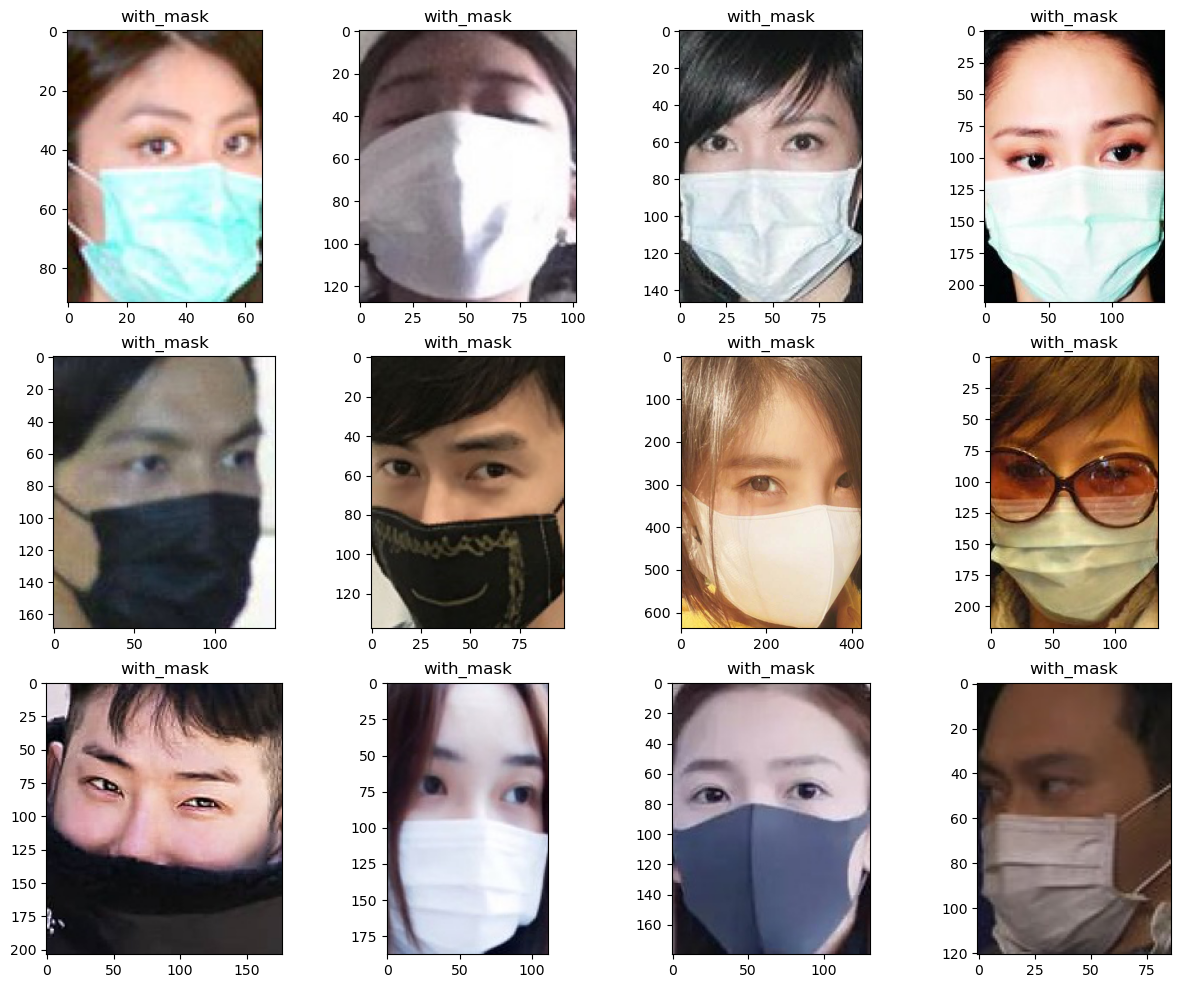

In [30]:
plt.figure(figsize = (15,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title("without_mask")
    else:
        plt.title("with_mask")

### Shuffle the images and plot them  

In [32]:
image, label = shuffle(image,label)

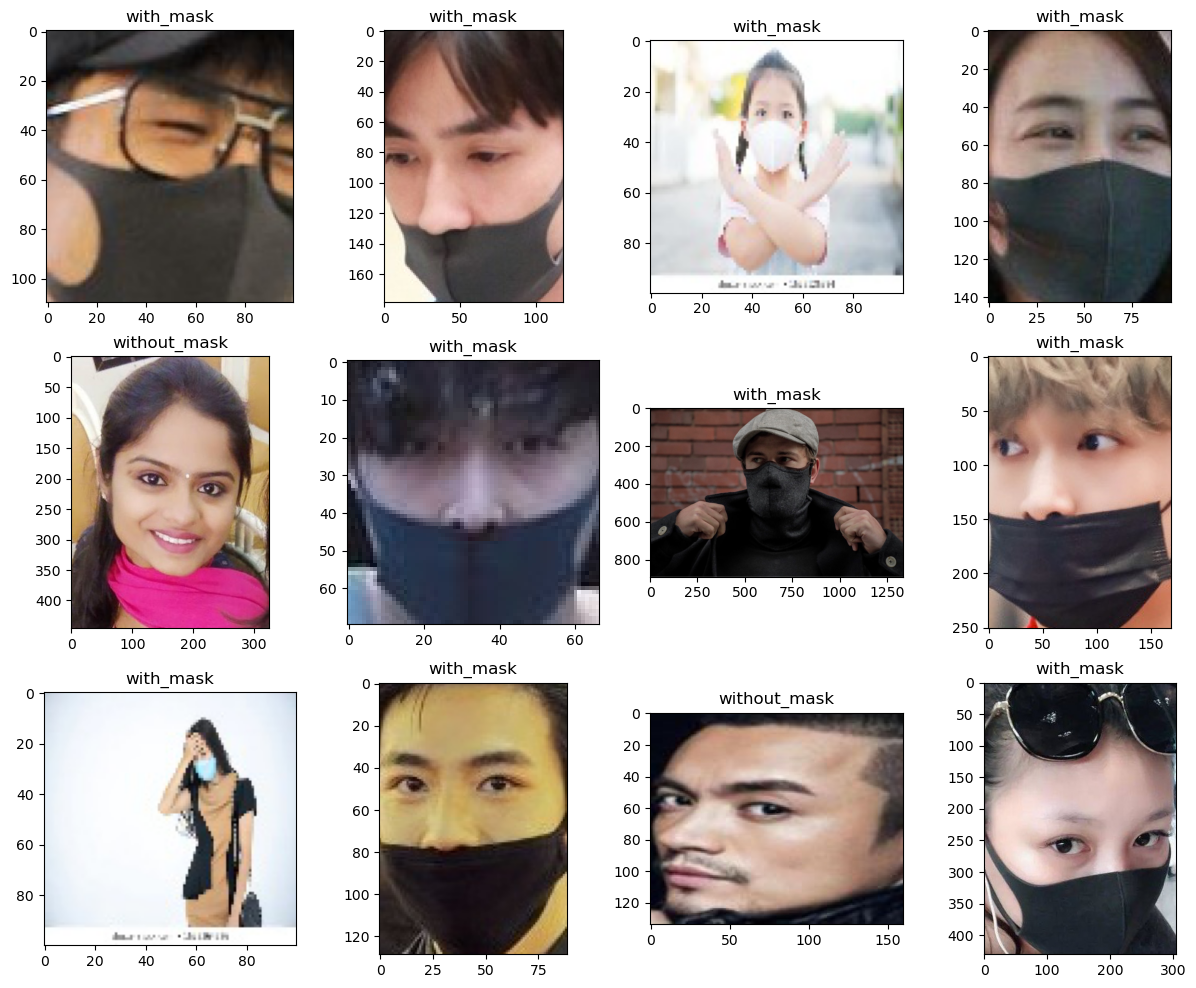

In [34]:
plt.figure(figsize = (15,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title("without_mask")
    else:
        plt.title("with_mask")

### Check the shape of some of the images and reshape them to same size

In [38]:
for i in range(10):
    print(image[i].shape)

(110, 100, 3)
(179, 118, 3)
(100, 100, 3)
(143, 96, 3)
(446, 324, 3)
(70, 67, 3)
(890, 1334, 3)
(251, 169, 3)
(100, 100, 3)
(129, 89, 3)


In [45]:
X = []

for i in image:
    X.append(resize(i, (64,64,3)))

X = np.array(X)

### Convert the label to array

In [48]:
y = np.array(label)

### Split into train test set

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [58]:
X_train.shape

(2441, 64, 64, 3)

In [60]:
y_train.shape

(2441,)

### Create Keras Sequential model 

In [70]:
model = Sequential()

model.add(layers.Conv2D(16,(3,3), activation = 'relu', input_shape =(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

          
          

### Compile our model

In [74]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Check model summary

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,673 (1.56 MB)

 Trainable params: 408,673 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [84]:
model.fit(X_train,y_train,epochs = 10, validation_split = 0.1)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7415 - loss: 0.5143 - val_accuracy: 0.9388 - val_loss: 0.1868
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9319 - loss: 0.2118 - val_accuracy: 0.9510 - val_loss: 0.1576
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9414 - loss: 0.1672 - val_accuracy: 0.9592 - val_loss: 0.1449
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9534 - loss: 0.1360 - val_accuracy: 0.9551 - val_loss: 0.1313
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9592 - loss: 0.1230 - val_accuracy: 0.9347 - val_loss: 0.1627
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9592 - loss: 0.1097 - val_accuracy: 0.9633 - val_loss: 0.1279
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9717 - loss: 0.0821 - val_accuracy: 0.9510 - val_loss: 0.1415
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9779 - loss: 0.0651 - val_accuracy: 0.9633 - v

### Evaluate the model

In [88]:
model.evaluate(X_train,y_train)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9961 - loss: 0.0313


[0.04070358723402023, 0.9905776381492615]

### Make predictions with X_test

In [95]:
prediction = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [97]:
prediction[:5]

array([[9.9618435e-01],
       [9.9018157e-01],
       [9.9959755e-01],
       [6.4545736e-04],
       [9.9992812e-01]], dtype=float32)

In [99]:
pred = []

for i in prediction:
    if i >0.5:
        pred.append(0)
    else:
        pred.append(1)

### Plot X_test with label from our prediction

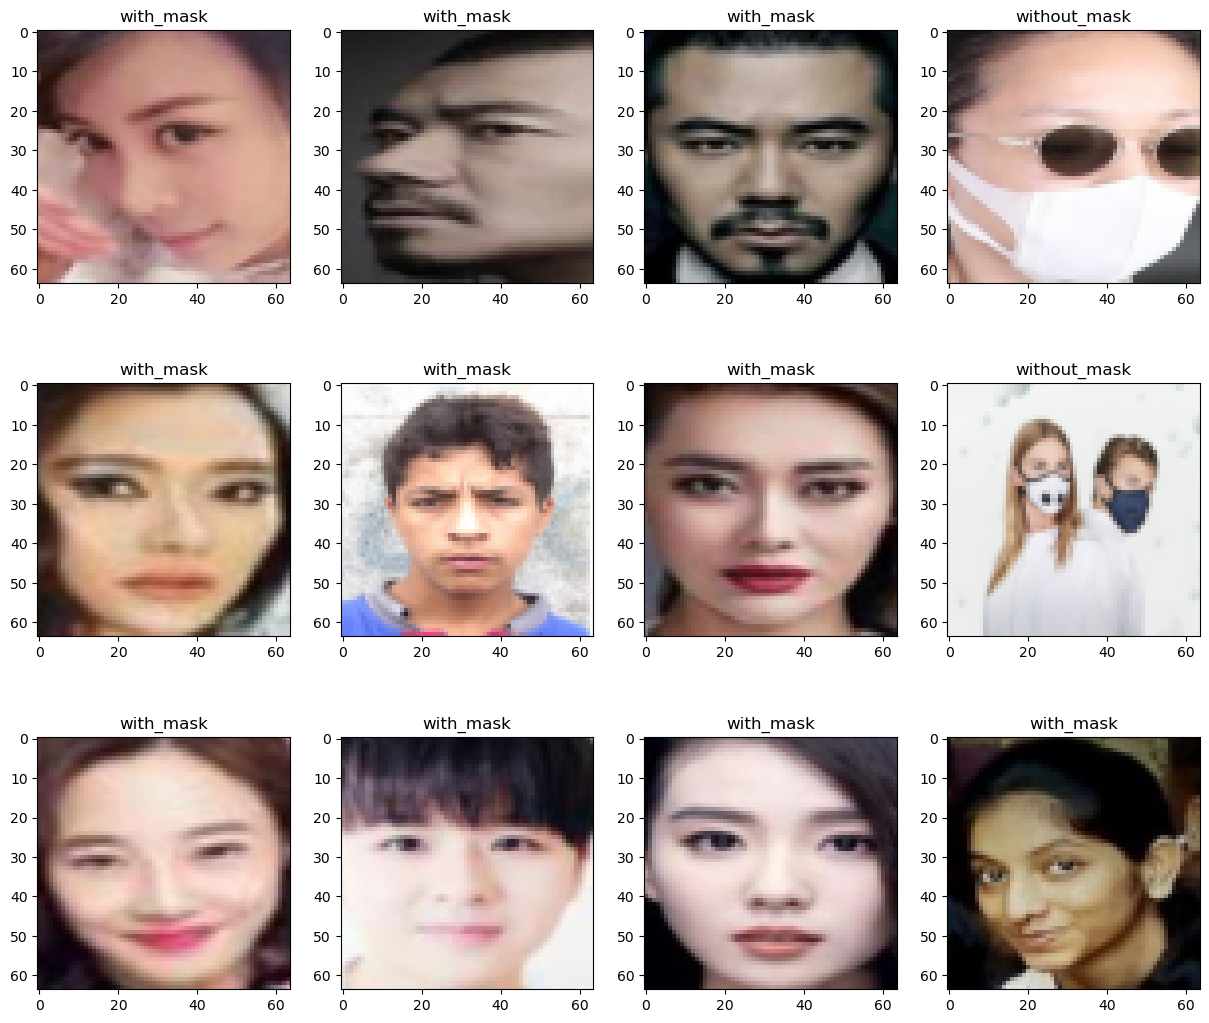

In [105]:
plt.figure(figsize = (15,13))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title("without_mask")
    else:
        plt.title("with_mask")


### Plot confusion matrix on a heatmap

<Axes: >

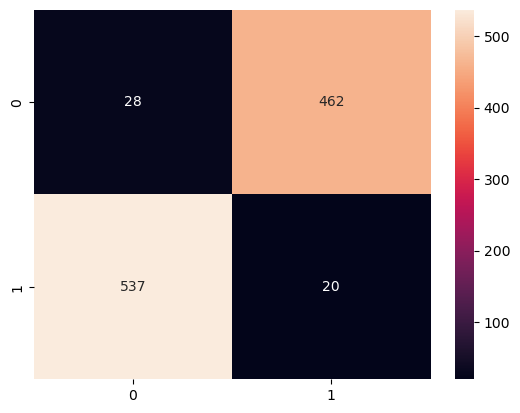

In [117]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True, fmt ='d')